In [4]:
############ test sample maps from Joachim

import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import sys
%matplotlib inline

In [5]:
sys.modules["mpi4py"] = None
from lenstools import ConvergenceMap


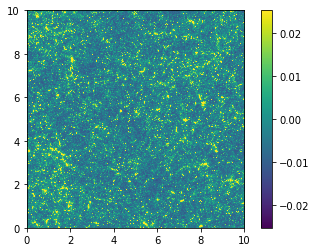

In [6]:
fname = '/global/cscratch1/sd/jialiu/desc-sprint-raytracing/kappa/kappa_LSST-SRD_tomo1_LOS74.fits'
imap = fits.open(fname)[0].data
istd=std(imap)
imshow(imap, vmin=-3*istd, vmax=3*istd, origin='lower', extent=[0,10,0,10])
colorbar()
#imap[0].data

In [7]:
os.listdir('/global/cscratch1/sd/jialiu/desc-sprint-raytracing/')

['kappa', 'Nz', 'Cov_maps', 'biased_maps', 'Cosmo_maps']

In [8]:
x=os.listdir('/global/cscratch1/sd/jialiu/desc-sprint-raytracing/Cov_maps')
print (x[:10])
print (len(x))

['kappa_LSST-SRD_tomo5_LOS157.fits', 'l2cl_kappa_LSST-SRD_tomo1.dat175', 'kappa_LSST-SRD_tomo2_LOS148.fits', 'kappa_LSST-SRD_tomo2_LOS78.fits', 'l2cl_kappa_LSST-SRD_tomo4.dat95', 'kappa_LSST-SRD_tomo3_LOS132.fits', 'kappa_LSST-SRD_tomo3_LOS147.fits', 'l2cl_kappa_LSST-SRD_tomo5.dat182', 'l2cl_kappa_LSST-SRD_tomo3.dat80', 'l2cl_kappa_LSST-SRD_tomo5.dat87']
1251


In [9]:
x=os.listdir('/global/cscratch1/sd/jialiu/desc-sprint-raytracing/Cosmo_maps/')
print (x[:10])
print (len(x))
print(sort(x)[:5])
print(sort(x)[-5:])

x=os.listdir('/global/cscratch1/sd/jialiu/desc-sprint-raytracing/Cosmo_maps/06_f')
print (x[:10])
print (len(x))

['23_a', '14_a', '10_a', '02_f', '04_f', '11_f', '01_f', '13_f', '00_a', '06_f']
52
['00_a' '00_f' '01_a' '01_f' '02_a']
['23_f' '24_a' '24_f' 'fid_a' 'fid_f']
['l2cl_kappa_LSST-SRD_tomo2.dat_cone1', 'kappa_LSST-SRD_tomo3_cone5.fits', 'kappa_LSST-SRD_tomo5_cone2.fits', 'kappa_LSST-SRD_tomo1_cone1.fits', 'l2cl_kappa_LSST-SRD_tomo1.dat_cone5', 'l2cl_kappa_LSST-SRD_tomo5.dat_cone1', 'kappa_LSST-SRD_tomo2_cone4.fits', 'l2cl_kappa_LSST-SRD_tomo1.dat_cone2', 'kappa_LSST-SRD_tomo3_cone3.fits', 'l2cl_kappa_LSST-SRD_tomo4.dat_cone5']
50


In [10]:
x=os.listdir('/global/cscratch1/sd/jialiu/desc-sprint-raytracing/biased_maps')[:20]
print (x[:10])
print (len(x))

['l2cl_kappa_LSST-SRD_tomo3_pz_zbias0.0007_simgaz0.01_outlier0.15.txt_cone1', 'kappa_LSST-SRD_tomo4_pz_zbias0.0015_simgaz0.06_outlier0.15.txt_LOS_cone1.fits', 'kappa_LSST-SRD_tomo3_pz_zbias0.0003_simgaz0.01_outlier0.15.txt_LOS_cone1.fits', 'l2cl_kappa_LSST-SRD_tomo5_pz_zbias0_simgaz0.01_outlier0.1.txt_cone1', 'kappa_LSST-SRD_tomo3_pz_zbias0_simgaz0.02_outlier0.05.txt_LOS_cone1.fits', 'l2cl_kappa_LSST-SRD_tomo3_pz_zbias0.0015_simgaz0.02_outlier0.05.txt_cone1', 'kappa_LSST-SRD_tomo3_pz_zbias0.0007_simgaz0.06_outlier0.15.txt_LOS_cone1.fits', 'l2cl_kappa_LSST-SRD_tomo3_pz_zbias0.0007_simgaz0.04_outlier0.15.txt_cone1', 'l2cl_kappa_LSST-SRD_tomo3_pz_zbias0.0003_simgaz0.02_outlier0.05.txt_cone1', 'kappa_LSST-SRD_tomo3_pz_zbias0.0003_simgaz0.06_outlier0.1.txt_LOS_cone1.fits']
20


In [11]:
test_fns = ['/global/cscratch1/sd/jialiu/desc-sprint-raytracing/biased_maps/kappa_LSST-SRD_tomo%i_pz_zbias0.0015_simgaz0.06_outlier0.15.txt_LOS_cone1.fits'%(i) 
          for i in range(1,6)]

# test_fns = ['/global/cscratch1/sd/jialiu/desc-sprint-raytracing/kappa/kappa_LSST-SRD_tomo%i_LOS74.fits'%(i) 
#           for i in range(1,6)]


In [12]:
test_maps = [fits.open(ifn)[0].data for ifn in test_fns]

In [13]:
for imap in test_maps:
    print (imap.shape)

(7745, 7745)
(7745, 7745)
(7745, 7745)
(7745, 7745)
(7745, 7745)


In [37]:
#!pip install --user lenstools

In [14]:
## https://lenstools.readthedocs.io/en/latest/examples/power_spectrum.html
from astropy import units as u
iconv_map = ConvergenceMap(data=imap, angle=10*u.degree)

In [15]:
thresholds = np.arange(amin(imap),amax(imap),0.05)
nu,peaks =iconv_map.peakCount(thresholds)

In [16]:
print(thresholds,nu.shape, peaks.shape)

[-0.13729699 -0.08729699 -0.03729699  0.01270301  0.06270301  0.11270301
  0.16270301  0.21270301  0.26270301  0.31270301  0.36270301  0.41270301
  0.46270301  0.51270301  0.56270301  0.61270301  0.66270301  0.71270301
  0.76270301  0.81270301  0.86270301  0.91270301  0.96270301  1.01270301
  1.06270301  1.11270301  1.16270301  1.21270301  1.26270301  1.31270301
  1.36270301  1.41270301  1.46270301] (32,) (32,)
